<a href="https://colab.research.google.com/github/Ludmila-Vivas/Aprendizaje-Automatico-1/blob/main/Vivas_Montolla_TP4_Corregido_AA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 TP1 AA1 - Regresion lineal

**Ludmila Anahí Vivas Montolla**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2) No pueden repetir el mismo dataset que ya haya definido un compañero.

3) Copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

4) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

5) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

6) Revise las fecha límite de entrega de este trabajo

## ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


##**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## ✅ Resolución:

He decidido trabajar con el Dataset "Heart Failure Clinical Records".

Link:https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Este dataset junta los datos sobre casos de fallos cardiacos. Como las columnas se encuentran nombradas en inglés y con términos técnicos del área, les dejo un pequeño resumen sobre qué datos tiene cada una:

*   age: edad del paciente
*   anaemia: disminución de glóbulos rojos
*   creatinine_phosphokinase: nivel de la enzima CPK en la sangre
*   diabetes: si tiene diabetes o no
*   ejection_fraction: porcentaje de sangre que sale del corazón en cada contracción
*   high_blood_pressure: si sufre de hipertensión
*   platelets: plaquetas en la sangre
*   serum_creatinine: nivel de creatinina sérica en la sangre
*   serum_sodium: nivel de sodio sérico en la sangre
*   sex: si es hombre o mujer
*   smoking: si fuma
*   time: periodo de seguimiento
*   death_event: si falleció en el proceso


*❗ Debido a que se encontraba caído la pagina, descargue el csv, lo cargue al archivo y lo subi desde Mi Drive.*

In [316]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [317]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AA1/AA1 TP/heart_failure_clinical_records_dataset.csv')

In [318]:
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## ✅ Resolución:

Para empezar a trabajar con los datos es necesario conocerlos, por lo cual primero imprimó la información del dataframe.

In [319]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


Al ver la información de los datos vemos que no se poseen NULL en los datos, es decir que todas las columnas están completas.



Como es sabido que tanto fumar como tener hipertensión suele aumentar las probabilidades de tener un ataque cardiaco, me parece más interesante ver la relación de las otras variables menos comunes (creatinine_phosphokinase - platelets - serum_creatinine - serum_sodium). Primero veo si hay alguna relación con la edad.

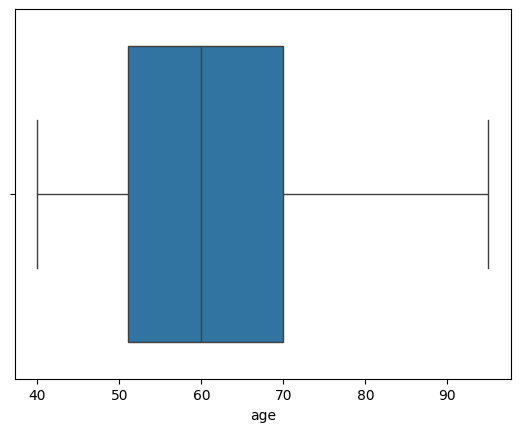

In [320]:
# Tomando a Age como la variable, realizó un boxplot para detectar si hay datos atípicos.
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = df["age"])
plt.show()

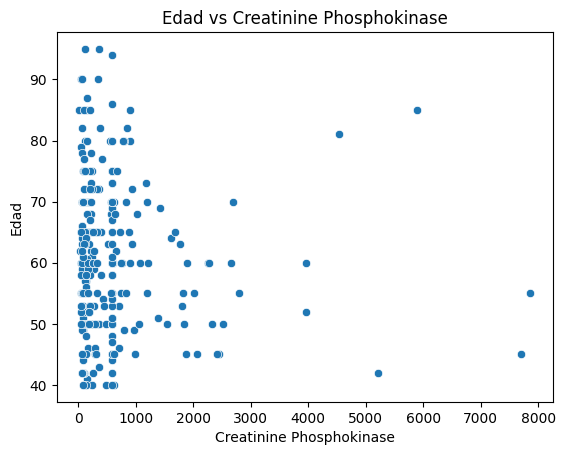

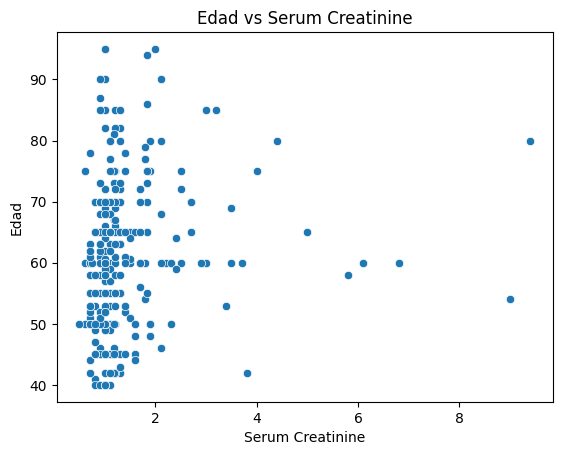

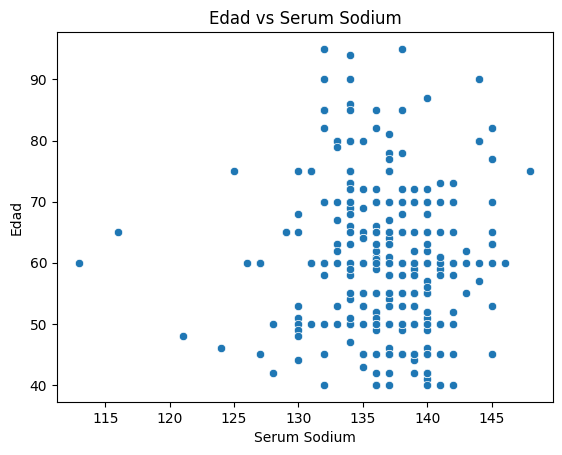

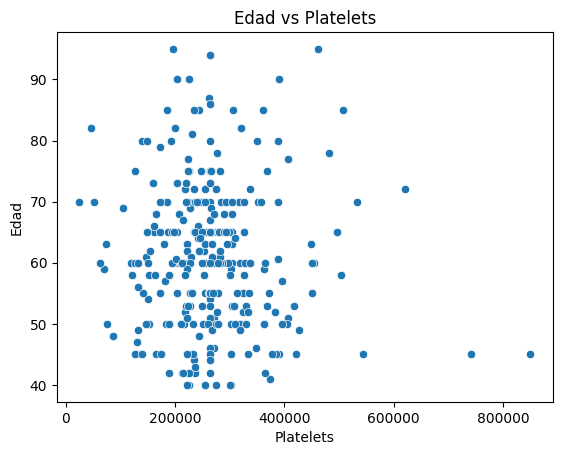

In [321]:
# También armé cuadros de dispersión  para detectar si hay relación entre la edad y las variables dichas anteriormente.
variables = ["creatinine_phosphokinase", "serum_creatinine", "serum_sodium", "platelets"]

for var in variables:
    sns.scatterplot(x=df[var], y=df["age"])
    plt.title(f"Edad vs {var.replace('_', ' ').title()}")
    plt.xlabel(var.replace('_', ' ').title())
    plt.ylabel("Edad")
    plt.show()

Después de ver los cuadros se puede decir que en todas estas variables hay una mayor concentración entre los 45 a 70 años. Esto puede deberse simplemente a que hay mas casos en ese rango etario.

Ambos creatinine (los dos primeros graficos) poseen una segmentación muy parecida, por lo que utilizarlo podria ser un poco redundante, ya que se trata en diferentes escalas a la misma enzima.

Voy a analizar estas mismas variables, pero esta vez agregando age en vez de creatinine_phosphokinase, y usando ejection_fraction (que nos indica que tanto bombea el corazón) como la variable independiente.

Y poder definir con cuales variables voy a trabajar.


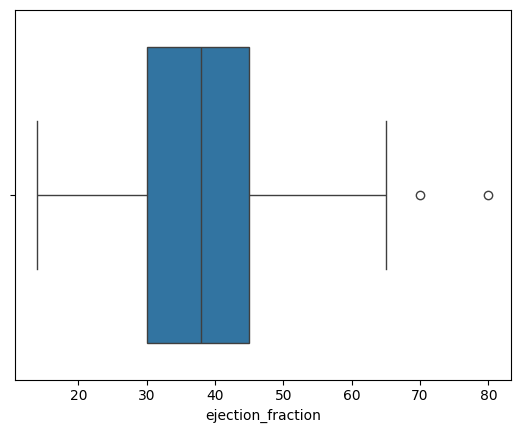

In [322]:
sns.boxplot(x = df["ejection_fraction"])
plt.show()

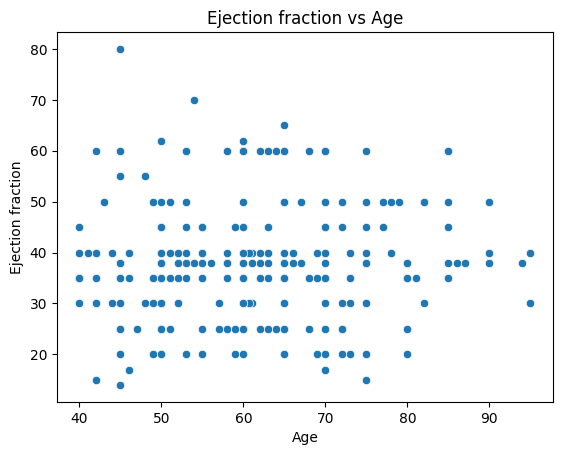

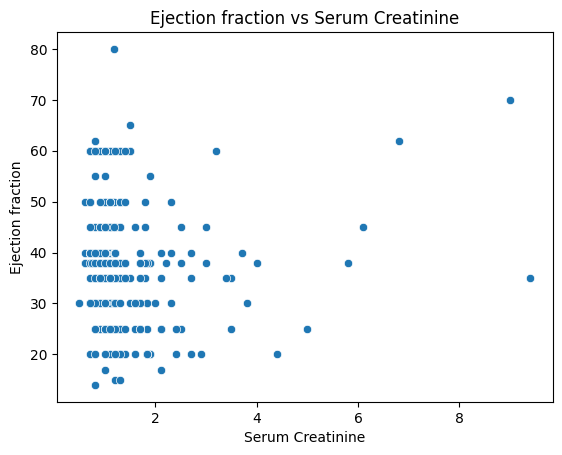

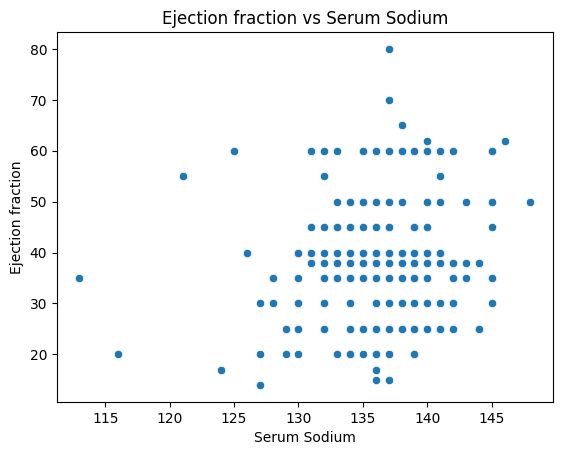

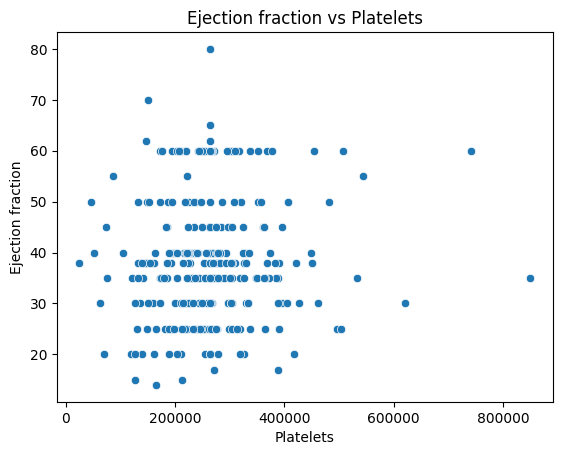

In [323]:
variables = ["age", "serum_creatinine", "serum_sodium", "platelets"]

for var in variables:
    sns.scatterplot(x=df[var], y=df["ejection_fraction"])
    plt.title(f"Ejection fraction vs {var.replace('_', ' ').title()}")
    plt.xlabel(var.replace('_', ' ').title())
    plt.ylabel("Ejection fraction")
    plt.show()

Viendo los cuadros notó el conteo de Serum_creatinine es el que posee datos más diferentes al normal (persona adulta: normal 0.5 a 1.5), por lo que también, dentro de su escala, va a tener más datos atípicos.

Los otros datos tambien posee casos diferentes a la norma pero la mayoria se encuentra dentro de las medidas normales para adultos.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## ✅ Resolución:

Después de ver los datos, he decidido trabajar con "age", "serum_creatinine", "serum_sodium" y "platelets" en relación con la variable "ejection_fraction".
Esto es debido a que, si bien la edad es un dato importante, creo que tiene más sentido desde un punto medico saber más de relación entre cómo funciona el corazón con las otras variables en caso de personas con ataque cardiacos.


Teniendo en cuenta la perpectiva con la que voy a procesar los datos, voy a empezar eliminando las columnas que no voy a utilizar:

**Muchos datos atipicos:** creatinine_phosphokinase

**Irrelevante:** time, DEATH_EVENT



In [324]:
df = df.drop(["DEATH_EVENT", "creatinine_phosphokinase", "time"], axis=1)
df.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,1,20,0,327000.00,2.7,116,0,0


Tambien las voy a renonmbrar en español para que sea más facil trabjar con las features.

In [325]:
renamed_columns = {
    "age": "Edad",
    "anaemia": "Anemia",
    "diabetes": "Diabetes",
    "ejection_fraction": "EF",
    "high_blood_pressure": "Presion_alta",
    "platelets": "Plaquetas",
    "serum_creatinine": "SC",
    "serum_sodium": "SS",
    "sex": "Sexo",
    "smoking": "Fuma"
}

df = df.rename(columns=renamed_columns)

In [326]:
x = df.drop(columns=['EF'])
y = df['EF']

Una vez que ya tengo solo las columnas seleccionadas, voy a pasar a armar boxplot de cada uno de los atributos numericos para ver cuál es la media y la cantidad de datos atípicos.

Como son datos tomados de personas que tuvieron un ataque cardiaco y, además, se desconocen otros datos de la historia clínica de los pacientes; no los voy a eliminar.


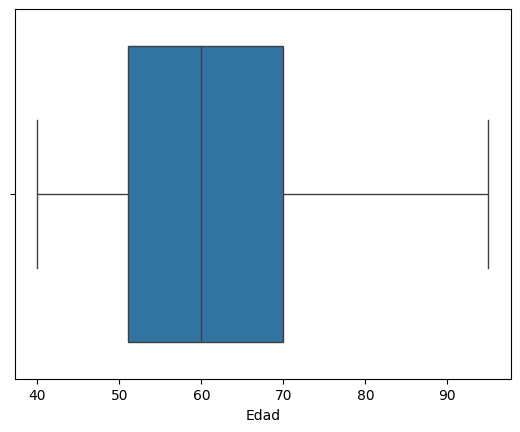

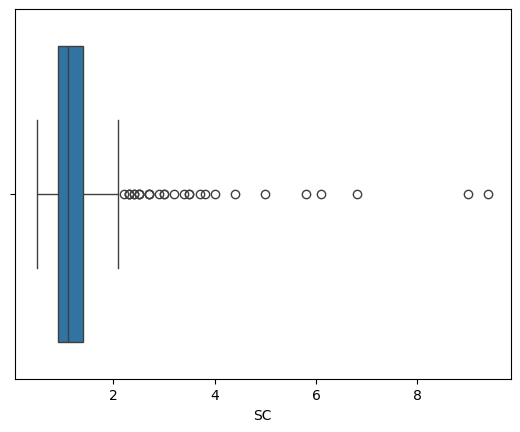

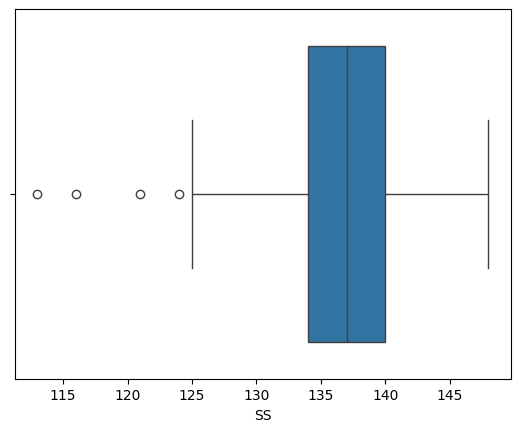

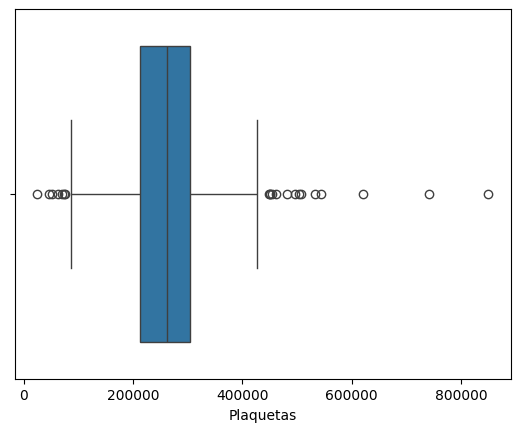

In [327]:
variables = [ "Edad", "SC", "SS", "Plaquetas" ]
for var in variables:
  sns.boxplot(x = df[var])
  plt.show()


Luego, como los features poseen escalas muy diferentes, voy a estandarizarlas utilizando Robust Scaler (que tiene en cuenta la media y el rango entre cuartiles).


In [333]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_std = scaler.fit_transform(x)

Por último, dividó los datos entre train/test, en este caso lo hare 70 - 30.

In [334]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


🔸 Modelo con datos de entrenamiento

In [335]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [337]:
print("Coeficientes del modelo: ", model.coef_)
print("Pendiente del modelo: ", model.intercept_)

Coeficientes del modelo:  [ 5.82163389e-02 -1.67851056e+00 -7.43759397e-01  1.09941420e+00
  4.85621170e-06  3.45582638e-01  3.75263519e-01 -4.87795589e+00
  2.59663795e-01]
Pendiente del modelo:  -14.492483528757603


In [338]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_train = r2_score(y, model.predict(x))
print(f"R-squared (R2): {r2_train}")

mse_train = mean_squared_error(y, model.predict(x))
print(f"Mean Squared Error (MSE): {mse_train}")

mae_train = mean_absolute_error(y, model.predict(x))
print(f"Mean Absolute Error (MAE): {mae_train}")

R-squared (R2): 0.04712902214352932
Mean Squared Error (MSE): 133.01603912891596
Mean Absolute Error (MAE): 9.051985606394986


🔸 Modelo con datos de testeo

In [339]:
y_pred = model.predict(x_test)

In [340]:
r2_test = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2_test}")

mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_test}")

mae_test = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae_test}")

R-squared (R2): 0.0013809459838178828
Mean Squared Error (MSE): 164.1543562485126
Mean Absolute Error (MAE): 10.174649323554993



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## ✅ Resolución:

Hice debajo un cuadro para que sea más fácil ver los coeficientes de las diferentes variables.

Podemos notar que el serum-sodium es el que posee más peso en modelo, seguido por platelets, ambos poseen valores similares. Y el que menos influye es serum_creatinine.


Todos los coeficientes en este caso son positivos, excepto por serum_creatinine.

In [342]:
coef = model.coef_
features_names = x.columns
coef_df = pd.DataFrame({"Atributos": features_names, "Coeficiente": coef})
coef_df

,Atributos,Coeficiente
0,Edad,0.058216
1,Anemia,-1.678511
2,Diabetes,-0.743759
3,Presion_alta,1.099414
4,Plaquetas,0.000005
5,SC,0.345583
6,SS,0.375264
7,Sexo,-4.877956
8,Fuma,0.259664



## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## ✅ Resolución:

Al iniciar el trabajo pense que Edad iba a ser la variable con más peso, pero al ver los coeficientes esta es Sexo. Ademas, podemos ver que varias features tienen una relacion negativa con la variable objetivo.

El modelo posee un error alto y muy bajo desempeño, es decir que el modelo no esta pudiendo terminar de entender la relacion entre la variables. Esto puede deberse a que se posee pocos datos, o que el modelo de Regresion Lineal no es el ideal para este problema.



---



# 🧪 TP4 AA1 - Redes Neuronales

Para el modelo de redes neuronales voy a cargar nuevamente el dataset que ya posee el preprocesamiento realizado en el TP1.

In [439]:
x = df.drop(columns=['EF'])
y = df['EF']

Por último, antes de empezar con los modelos, voy a dividir entre train(80%) - test(20%).

In [440]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)


In [441]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 🔽 Caso 1: Underfitting

Para que el modelo tenga Underfitting es necesario que los errores, tanto de entrenamiento como de testeo, sean altos.

Asi que voy a crear una funcion para evaluar el modelo con diferentes parametros y de esta forma definir con cual se crea un mejor modelo con Underfitting.

In [348]:
def train_and_evaluate(hidden_layer_sizes, max_iter, alpha):
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=alpha, random_state=42)
    mlp.fit(x_train, y_train)

    y_train_pred = mlp.predict(x_train)
    y_test_pred = mlp.predict(x_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return train_error, test_error, mlp

hidden_layers_list = [(5,),(10,),(15,), (20,), (50,)]
iter = 100
alpha_value = 0.01

train_resultados = []
test_resultados = []

for hidden_layers in hidden_layers_list:
    train_error, test_error, mlp_model = train_and_evaluate(hidden_layers, max_iter=iter, alpha=alpha_value)
    train_resultados.append((hidden_layers, alpha_value, train_error))
    test_resultados.append((hidden_layers, alpha_value, test_error))
    print(f"Hiperparámetros: hidden_layers={hidden_layers}, alpha={alpha_value}")
    print(f"  - Error de entrenamiento: {train_error:.4f}")
    print(f"  - Error de prueba: {test_error:.4f}\n")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(5,), alpha=0.01
  - Error de entrenamiento: 22965260.3844
  - Error de prueba: 24733716.9527

Hiperparámetros: hidden_layers=(10,), alpha=0.01
  - Error de entrenamiento: 488135.2261
  - Error de prueba: 523363.7285

Hiperparámetros: hidden_layers=(15,), alpha=0.01
  - Error de entrenamiento: 214096.2700
  - Error de prueba: 232948.3493

Hiperparámetros: hidden_layers=(20,), alpha=0.01
  - Error de entrenamiento: 145.2211
  - Error de prueba: 154.0783

Hiperparámetros: hidden_layers=(50,), alpha=0.01
  - Error de entrenamiento: 12614289.8579
  - Error de prueba: 13512304.8918



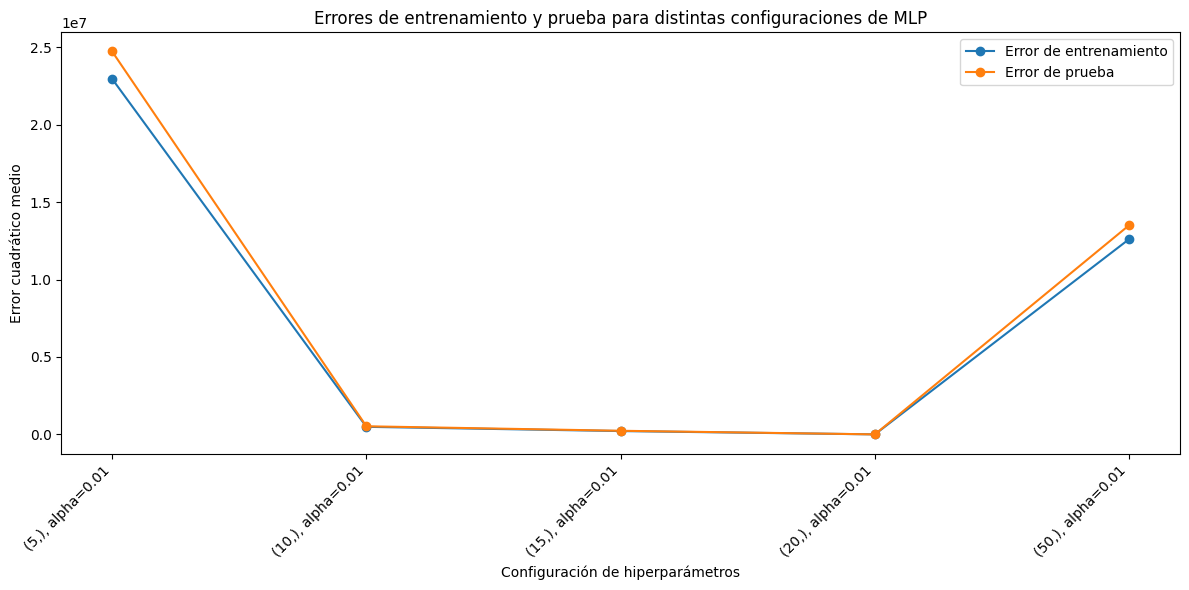

In [349]:
hidden_layer_labels = [f"{hl}, alpha={alpha_value}" for hl, _, _ in train_resultados]
train_error_values = [error for _, _, error in train_resultados]
test_error_values = [error for _, _, error in test_resultados]

plt.figure(figsize=(12, 6))
x = np.arange(len(hidden_layer_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o')
plt.plot(x, test_error_values, label='Error de prueba', marker='o')
plt.xticks(x, hidden_layer_labels, rotation=45, ha='right')
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Error cuadrático medio')
plt.title('Errores de entrenamiento y prueba para distintas configuraciones de MLP')
plt.legend()
plt.tight_layout()
plt.show()


Con esto podemos ver que teniendo una sola capa oculta con 5 neuronas posee mayor error en entrenamiento y testeo generando el Underfitting, ya que el modelo no logra aprender.
Mientras que la cantidad de neuronas va aumento, el MSE va disminuyendo.

## 🔼 Caso 2: Overfitting

En el caso del Overfitting, esto ocurre cuando el modelo aprende los datos de entrenamiento, por lo cual posee una metricas de error baja. Pero al modificarle los datos con los de testeo, este error sube.

In [436]:
def train_and_evaluate(hidden_layer_sizes, max_iter, alpha):
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=alpha, random_state=42)
    mlp.fit(x_train, y_train)

    y_train_pred = mlp.predict(x_train)
    y_test_pred = mlp.predict(x_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return train_error, test_error, mlp

hidden_layers_list = [(100,75),(50,100),(100,75),(100,150),(150,100)]
iter = 1500
alpha_value = 0.75

train_resultados = []
test_resultados = []

for hidden_layers in hidden_layers_list:
    train_error, test_error, mlp_model = train_and_evaluate(hidden_layers, max_iter=iter, alpha=alpha_value)
    train_resultados.append((hidden_layers, alpha_value, train_error))
    test_resultados.append((hidden_layers, alpha_value, test_error))
    print(f"Hiperparámetros: hidden_layers={hidden_layers}, alpha={alpha_value}")
    print(f"  - Error de entrenamiento: {train_error:.4f}")
    print(f"  - Error de prueba: {test_error:.4f}\n")

Hiperparámetros: hidden_layers=(100, 75), alpha=0.75
  - Error de entrenamiento: 457.2190
  - Error de prueba: 599.5957

Hiperparámetros: hidden_layers=(50, 100), alpha=0.75
  - Error de entrenamiento: 266.1672
  - Error de prueba: 288.1480

Hiperparámetros: hidden_layers=(100, 75), alpha=0.75
  - Error de entrenamiento: 457.2190
  - Error de prueba: 599.5957

Hiperparámetros: hidden_layers=(100, 150), alpha=0.75
  - Error de entrenamiento: 407.1891
  - Error de prueba: 577.6829

Hiperparámetros: hidden_layers=(150, 100), alpha=0.75
  - Error de entrenamiento: 471.2986
  - Error de prueba: 598.6088



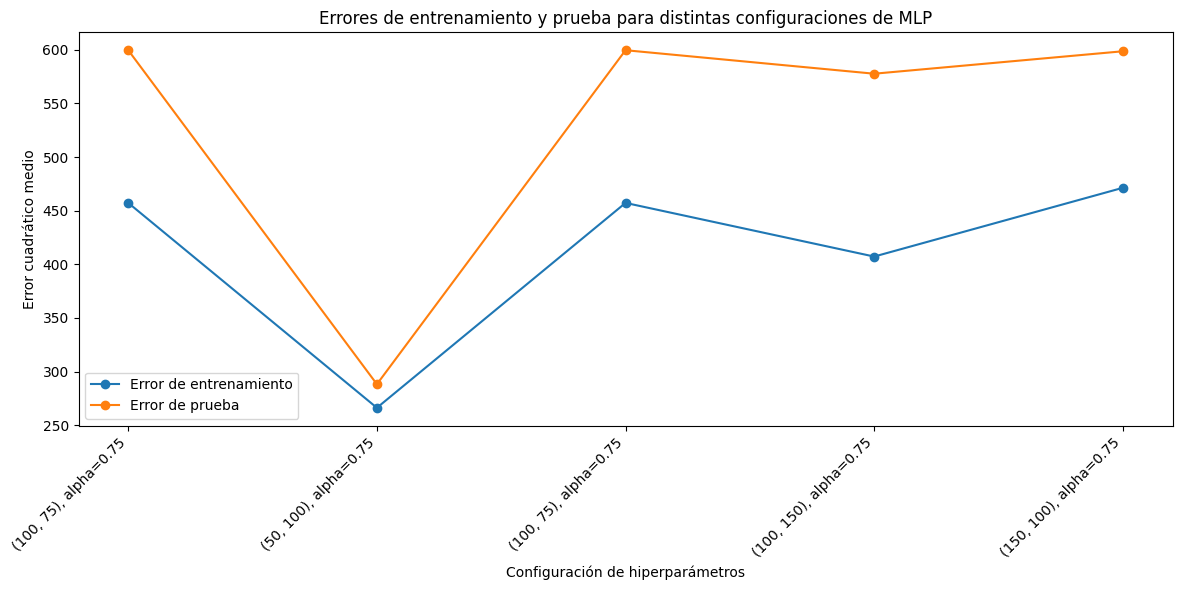

In [437]:
hidden_layer_labels = [f"{hl}, alpha={alpha_value}" for hl, _, _ in train_resultados]
train_error_values = [error for _, _, error in train_resultados]
test_error_values = [error for _, _, error in test_resultados]

plt.figure(figsize=(12, 6))
x = np.arange(len(hidden_layer_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o')
plt.plot(x, test_error_values, label='Error de prueba', marker='o')
plt.xticks(x, hidden_layer_labels, rotation=45, ha='right')
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Error cuadrático medio')
plt.title('Errores de entrenamiento y prueba para distintas configuraciones de MLP')
plt.legend()
plt.tight_layout()
plt.show()


Se puede ver en el grafico que con los atributos que se probaron despues de (50,100) tanto con los datos de train como de test subio el error. Pero con los datos de testeo este error ha aumentado más en comparacion a los datos de entrenamiento.

## ⏩ Caso 3: Aceptable

In [428]:
mlp = MLPRegressor(hidden_layer_sizes=(50,100), max_iter=250, alpha=0.01, activation="tanh", random_state=42)

mlp.fit(x_train, y_train)

y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [429]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Entrenamiento:")
print(f"  - MSE: {train_mse:.4f}")
print(f"  - MAE: {train_mae:.4f}")
print(f"  - R2 : {train_r2:.4f}\n")

print("Testeo:")
print(f"  - MSE: {test_mse:.4f}")
print(f"  - MAE: {test_mae:.4f}")
print(f"  - R2 : {test_r2:.4f}")

Entrenamiento:
  - MSE: 135.9606
  - MAE: 8.7480
  - R2 : -0.0058

Testeo:
  - MSE: 156.5324
  - MAE: 9.8254
  - R2 : -0.0000


Para este caso, segui con las dos capas ocultas del modelo con Overfitting pero baje la cantidad de iteraciones y el alpha, y ademas le sume activacion Tanh.

De esta forma vemos que tanto el entrenamiento como el testeo poseen valores de error similar. De igual manera el modelo tienen un desempeño general bajo.



---



# ✨ Comparación TP1 y TP4

Al comparar los resultados de ambos modelos vemos que en ambos casos se posee un error elevado y un bajo desempeño del modelo. En el caso de MLP sus metricas son mejores pero por muy poco.

Regresion Lineal:
  - MSE: 164.1543
  - MAE: 10.1746
  - R2 : 0.0013

MLP
  - MSE: 152.9305
  - MAE: 9.7960
  - R2 : 0.0230
